# Introduction and week #1

The first week will cover some interesting points like:<br>
-discretization<br>
-computational meshes and grids<br>
-parallel computing<br>
-introduction to python and jupyter<br>

The application of the finite difference method starts only in the week #2.<br>
So we will basically have a review of some stuff this week.

### Introduction to spatial scales and meshing

So the motivation is rather straightforward, since we need to discretize
the waves for a given physical phenomena properly. For the example of considering
a sismic wave we have the frequency $f\simeq 1 Hz$ and the speed is $v\simeq 3 km/s \simeq 10^4 km/h$. Consequently, the wavelength associated is $\lambda \simeq 3km$.<br>
Supposing that we want to discretize this wave with **10 grid points per wavelength** (assuming that we are looking at a single Fourier component).<br>
**1)** How should we discretize the Earth if we want to describe wave scattering problems
associated to this kind of wave?


Since the wavelength is $\lambda \simeq 3km$, the space between each grid point is $0.3km$.
The volume associated to each grid cube is $V_g = 0.027 km^3$ and the volume of Earth is $V_E  \simeq 8,12 \times 10^{11} km^3$. Therefore, we need a total of $N = 3\times 10^{13}$ to discretize the entire Earth.

Double precision number uses $64$ bits, or $8$ bytes (B) , of memory to stores it. Consequently, if we want to store the information of the field described above propagating on Earth, we would need $8 \text{B} \times 3\times 10^{13} = 32\text{TB}$ to describe it. So, we see that is required a **huge** amount of memory to describe it properly and that is the reason why parallel computing is useful, because would allow us to solve part of this issue. However, during most part of the course would use 1D, at best 2D problems.

### Meshes

For the 1D problem there is not too much to talk about. But when one considers the two
dimensional problem, different Meshes (or discretization) can be used. For example, maybe depending on the curve that you want to "capture", the square regular discretization is not the best one to be used. Maybe using one with triangles would allow to encompass better the curve that you want to describe. But from a mathematical computational point of view that could be unnecessary.

An approach which could help in this situation is the so called *octree* approach, where you increase the number of meshes/grids in the area of interest. There are several ways to handle complex geometries, generally more complicated and envolving meshes have to be used. Therefore, the part related to finding a good or better meshes for the discretization is a problem by itself.

When one considers a single Fourier component, a crucial question to be answered is: *how many grid points do we need per wavelength for a particular method?*<br>
This is called a *grid method* where we simply take a given number of grid points.

The finite element method you divide up the spatial domain into elements, and inside these elements, one approaches it with a linear function connecting these points. By this approximation we know the wave field in all points, despite of not having a perfect match between the approximation and the sinusoidal field at all values. Since we have information about the field in all values, it is different to the finite difference method, where one knows the values only at specific points.

### Acoustic wave equation

The wave equation without sources is given by

$$\partial_t^2p(x,t) = c(x)^2\partial_x^2p(x,t)\quad (1)\,,$$

where we have assumed that in a more general case the speed of the wave $c$ can have different values at different points. In the case where it has a constant throughout
the entire space it will be defined as $c_0$. In this case we can have simple analytical solutions.

For example, suppose a plane-wave solution like $p = p_0e^{i(kx -\omega t)}$. It is a solution if the dispersion related is satisfied

$$\omega = c k$$

Another kind of equation that we are going to solve along the course is the equation for
the pressure, for example, which is governed by the following equation

$$ \partial_t P + c\partial_x P = 0\quad (2)\,.$$

With respect to coefficients in our differential equation, we can analyze the discriminant and classify it. Assuming the follow decomposition

\begin{equation}
Ap_{xx} + Bp_{xt} + Cp_{tt} + Dp_x +Ep_t + Fp\quad =0 \quad (3)\,,
\end{equation}

we have in our equation $A = c^2$, $C = -1$ and $B=0$. Consequently we have
$0-4c^2(-1) > 0$, which turns out to be

\begin{equation}
B² - 4AC > 0\quad (4)\,,
\end{equation}

and therefore our equation is a hyperbolic differential equation.

### Parallel computing

Essentially an overview of different ways that a computer can work for solving a problem numerically

### A bit of wave Physics

-Analytical solution for the case where there is no source.
-The source being a delta function, i.e.,
$$ \partial_t^2p(x,y) = c^2\partial_x^2p(x,y)  + s(x,t)$$

The impulse response is th Green's function of the differential equation and it
is obtained when the source is like

$$ s(x,t) = \delta(x-x_0)\delta(t-t_0)$$

For homogeneous media, c(x,t) \equiv c_0, we can use it to compare our numerical
to analytical results.

Another similar equation (but instead of longitudinal waves, one has transverse ones)
is the equation for the amplitude of oscillation of a guitar string, for instance.
The equation is

$$\rho \partial_t^2u_y = \partial_x\big(\mu\partial_xu_y\big) + f_y\,,$$
where $\rho$ is the density, $\mu$ is the shear modulus (related to the stifness),
$f_y$ it is a kind of source term and $u_y$ is the amplitude along the $y-$direction.

Assuming a homogeneous medium, one has

$$\partial_t^2u_y = \frac{\mu}{\rho}\partial_x^2u_y + f_y\,,$$
and it is identical to the former equation with $c \equiv \sqrt{\mu/\rho}$

**Time reversal symmetry**
He discuss a very nice and simple example and discuss
about its aplicabillity in medical tomography. if one has a source point, which
radiates electromagnetic fields and one has a bunch of detectors on a circle around
the emitter, one could invert the emitters and make them radiate, they would focus
on the spatial location of the source point.

**Structural heterogeneities**
This is related to the fact that the quantities $c,\mu$ and $\rho$ can vary depending
on the spatial point that one is looking at.

Supposing a homogeneous medium, the pressure (longitudinal wave) equation has
an analytical solution by means of the Green's function. Numerically, we have
the issue that since we are solving for a delta function in time, we have infinity
frequencies involved and can't solve the problem for infinity frequencies, we will
always have a band limited solution to the Green's function. However, we can do the
convolution between the Green's function and the source to obtain the result.
The Green's function acts like a propagator for the problem.

The main point is that the numerical Green's function is not a Heaviside function,
whereas the analytical one is. The numerical version of it contains some oscillations,
nevertheless, working with it and the source, one could obtain the correct result by 
a filtering process.

### Python and Jupyter notebooks

Playing around with Jupyter notebook and some Python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,1000)

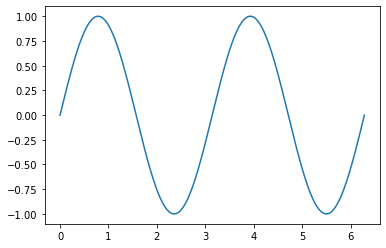

In [4]:
k = 2

plt.plot(x,np.sin(k*x))
plt.show()

### Exercise #3

$c = 1490 m/s\\
f = 10 kHz\\
g=20 \text{ grid points per wavelenght}\\
Volume\, (V) = 10^5m$

Supposing a regular spatial grid

She will need

$\frac{V. g}{\lambda^3} $

In [2]:
c = 1490
f = 2*10**4
wl = c/f
volume = 10*100*100
grid_points_volume = 20**3

print ((20**3)*volume/(wl**3))

1934733576605.9272


### The result above gives $\approx 2,42.10^{11}$, however the answer seems to be $10^9$ instead

### Exercise #4

The lower half of the basin is filled with sand and the speed of sound increases
to $3.10^3m/s$ at this half. Since the speed is twice bigger, the wavelength would
multiplied by two as well. Consequently the half part filled with water is described
by $1,21.10^{11}$ grid points and the part with sand is described by a smaller amount
of grid points, since the wavelength is bigger. This conversion is easy to be done
since we only need to divide the other remaining part by $8$, which is $0,15.10^{11}$
grid points.

Since we use one 8byte to describe each point, we would need roughly $1,36.10^{11}Bytes$.


In [1]:
c_water = 1490
f = 2*10**4
wl_water = c_water/f

c_sand = 3000
wl_sand = c_sand/f

vol = 5*100*100

vol_grid_water = (wl_water/20)**3
vol_grid_sand = (wl_sand/20)**3

points_water = vol/vol_grid_water
points_sand = vol/vol_grid_sand

print ((points_water + points_sand)*8)

8687082454571.856


In [38]:
points_water/points_sand #order of TB

8.162157276306253